In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.layers import Input, Dense, Flatten, Reshape, Dropout
from keras.models import Model
from sys import exit

In [2]:
img_rows = img_cols = 28
mnist = not True
flatten = not True
reshape = True
pathToData = 'mnist/' if mnist else 'emnist/'
num_classes = 10 if mnist else 26
epochs = 35  # if mnist else 40
fn_model = pathToData + 'lk3.h5'
# 
pathToHistory = 'mnist/' if mnist else 'emnist/'
suff = '.txt'
# Имена файлов, в которые сохраняется история обучения 
fn_loss = pathToHistory + 'loss_' + suff
fn_acc = pathToHistory + 'acc_' + suff
fn_val_loss = pathToHistory + 'val_loss_' + suff
fn_val_acc = pathToHistory + 'val_acc_' + suff

In [3]:
def one_plot(n, y_lb, loss_acc, val_loss_acc):
    plt.subplot(1, 2, n)
    if n == 1:
        lb, lb2 = 'loss', 'val_loss'
        yMin = 0
        yMax = 1.05 * max(max(loss_acc), max(val_loss_acc))
    else:
        lb, lb2 = 'acc', 'val_acc'
        yMin = min(min(loss_acc), min(val_loss_acc))
        yMax = 1.0
    plt.plot(loss_acc, color='r', label=lb, linestyle='--')
    plt.plot(val_loss_acc, color='g', label=lb2)
    plt.ylabel(y_lb)
    plt.xlabel('Эпоха')
    plt.ylim([0.95 * yMin, yMax])
    plt.legend()

In [4]:
def loadBinData(pathToData, img_rows, img_cols):
    print('Загрузка данных из двоичных файлов...')
    with open(pathToData + 'imagesTest.bin', 'rb') as read_binary:
        x_test = np.fromfile(read_binary, dtype=np.uint8)
    with open(pathToData + 'labelsTest.bin', 'rb') as read_binary:
        y_test = np.fromfile(read_binary, dtype=np.uint8)
    x_test = x_test.reshape(-1, img_rows, img_cols).transpose(0, 2, 1)
    return x_test, y_test

In [5]:
x_train, y_train, x_test, y_test = loadBinData(pathToData, img_rows, img_cols)

Загрузка данных из двоичных файлов...
Преобразуем массивы меток в категориальное представление


In [6]:
# Определяем форму входных данных 
input_shape = (img_rows, img_cols)
# 
# Создание модели нейронной сети 
inp = Input(shape = input_shape) # Входной слой 
x = inp 
x = Flatten()(x) # Преобразование 2D в 1D 
x = Dense(units = 32, activation = 'relu')(x) 
output = Dense(num_classes, activation = 'softmax')(x) 
model = Model(inputs = inp, outputs = output) 
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 26)                858       
Total params: 25,978
Trainable params: 25,978
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Определяем форму входных данных 
input_shape = (img_rows, img_cols)
# 
# Создание модели нейронной сети 
inp = Input(shape=input_shape)  # Входной слой
x = inp
if flatten:
    x = Flatten()(x)  # Преобразование 2D в 1D
elif reshape:
    x = Reshape((-1, ))(x)
x = Dense(units=256, activation='relu')(x)
x = Dropout(0.15)(x)
output = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=inp, outputs=output)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 26)                6682      
Total params: 207,642
Trainable params: 207,642
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', loss='mse')

In [8]:
import time 
start = time.time() 
history = model.fit(x_train, y_train, batch_size=128, epochs=epochs,
                    verbose=2, validation_data=(x_test, y_test))
print('Время вычислений:', time.time() - start)
print('Модель сохранена в файле', fn_model)
model.save(fn_model)

Epoch 1/35
975/975 - 8s - loss: 0.0144 - accuracy: 0.7327 - val_loss: 0.0094 - val_accuracy: 0.8329
Epoch 2/35
975/975 - 6s - loss: 0.0089 - accuracy: 0.8427 - val_loss: 0.0075 - val_accuracy: 0.8672
Epoch 3/35
975/975 - 8s - loss: 0.0074 - accuracy: 0.8703 - val_loss: 0.0066 - val_accuracy: 0.8833
Epoch 4/35
975/975 - 7s - loss: 0.0067 - accuracy: 0.8833 - val_loss: 0.0062 - val_accuracy: 0.8918
Epoch 5/35
975/975 - 6s - loss: 0.0062 - accuracy: 0.8921 - val_loss: 0.0059 - val_accuracy: 0.8940
Epoch 6/35
975/975 - 6s - loss: 0.0058 - accuracy: 0.8978 - val_loss: 0.0057 - val_accuracy: 0.8989
Epoch 7/35
975/975 - 6s - loss: 0.0055 - accuracy: 0.9038 - val_loss: 0.0057 - val_accuracy: 0.8992
Epoch 8/35
975/975 - 6s - loss: 0.0053 - accuracy: 0.9067 - val_loss: 0.0055 - val_accuracy: 0.9027
Epoch 9/35
975/975 - 7s - loss: 0.0052 - accuracy: 0.9095 - val_loss: 0.0056 - val_accuracy: 0.9004
Epoch 10/35
975/975 - 5s - loss: 0.0050 - accuracy: 0.9127 - val_loss: 0.0054 - val_accuracy: 0.9040

In [9]:
history = history.history
## for itm in history.items(): print(itm)
with open(fn_loss, 'w') as output:
    for val in history['loss']: output.write(str(val) + '\n')
with open(fn_acc, 'w') as output:
    for val in history['accuracy']: output.write(str(val) + '\n')
with open(fn_val_loss, 'w') as output:
    for val in history['val_loss']: output.write(str(val) + '\n')
with open(fn_val_acc, 'w') as output:
    for val in history['val_accuracy']: output.write(str(val) + '\n')

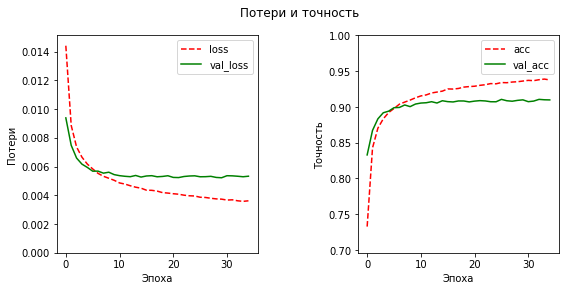

In [10]:
# Вывод графиков обучения
plt.figure(figsize=(9, 4))
plt.subplots_adjust(wspace=0.5)
one_plot(1, 'Потери', history['loss'], history['val_loss'])
one_plot(2, 'Точность', history['accuracy'], history['val_accuracy'])
plt.suptitle('Потери и точность')
plt.show()

In [53]:
pred = model.predict(x_train)
predicted_classes = np.array([np.argmax(m) for m in pred])
if not mnist:
    import string
    letters = list(string.ascii_uppercase)
    predicted_classes = [letters[m] for m in predicted_classes]
l = len(predicted_classes)

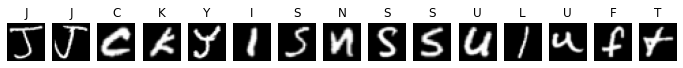

In [56]:
f = plt.figure(figsize=(12, 5))
for i in range(15):
    j = np.random.randint(0, high=l, dtype=int)
    sp = f.add_subplot(1, 15, i+1)
    sp.axis('Off')
    sp.set_title(predicted_classes[j])
    plt.imshow(x_train[j], cmap='gray')
plt.show()

In [65]:
pred = model.predict(x_test)
predicted_classes = np.array([np.argmax(m) for m in pred])
if not mnist:
    import string
    letters = list(string.ascii_uppercase)
    predicted_classes = [letters[m] for m in predicted_classes]
l = len(predicted_classes)

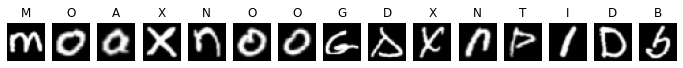

In [66]:
f = plt.figure(figsize=(12, 5))
for i in range(15):
    j = np.random.randint(0, high=l, dtype=int)
    sp = f.add_subplot(1, 15, i+1)
    sp.axis('Off')
    sp.set_title(predicted_classes[j])
    plt.imshow(x_test[j], cmap='gray')
plt.show()

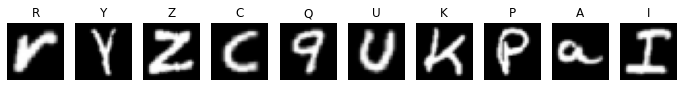

In [59]:
import string
l = len(x_test)
letters = list(string.ascii_uppercase)
pred = model.predict(x_test)
f = plt.figure(figsize=(12, 5))
for i in range(10):
    j = np.random.randint(0, high=l, dtype=int)
    sp = f.add_subplot(1, 10, i+1)
    sp.axis('Off')
    sp.set_title(letters[np.argmax(pred[j])])
    plt.imshow(x_test[j], cmap='gray')
plt.show()

In [23]:
import string
letters = list(string.ascii_uppercase)

In [11]:
pred = model.predict(x_test)
pred = np.argmax(pred, axis=1)

In [39]:
pred

array([ 0,  0,  0, ..., 25, 25, 25], dtype=int64)

In [12]:
mask = []
for i in range(len(pred)): 
    mask.append(pred[i] == np.argmax(y_test[i]))

In [50]:
print(mask[:100])

[True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True, True, True, True, True, False, True, True, True, True, True, True, True, True, True]


In [13]:
x_false = []
for i in range(len(x_test)):
    if not mask[i]:
        x_false.append(x_test[i])
preds_incorrect = []
for i in range(len(x_test)):
    if not mask[i]:
        preds_incorrect.append(pred[i])
y_test_true = []
for i in range(len(x_test)):
    if not mask[i]:
        y_test_true.append(y_test[i])

In [59]:
preds_incorrect[:10]

[2, 16, 16, 20, 13, 19, 6, 16, 25, 14]

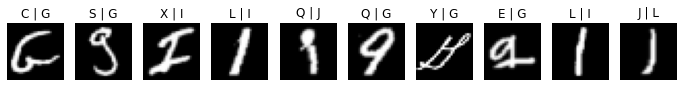

In [24]:
l = len(y_test_true)
f = plt.figure(figsize=(12,5))
for i in range(10):
    j = np.random.randint(0, high=l, dtype=int)
    sp = f.add_subplot(1,10,i+1)
    sp.axis('Off')
    sp.set_title("{} | {}".format(letters[preds_incorrect[j]], letters[np.argmax(y_test_true[j])]))
    plt.imshow(x_false[j], 'gray')

plt.show()

In [21]:
l = len(y_test)
i = 1
k = 0
acc = []
tmp_acc = 0
for j in range(l):
    if mask[j]:
        tmp_acc += 1
    if j == (799 * i) + k:
        i += 1
        k += 1
        acc.append((tmp_acc * 100) / 800)
        tmp_acc = 0
print(acc)

[91.5, 93.0, 94.125, 90.875, 94.125, 92.375, 72.875, 92.0, 72.625, 91.75, 92.375, 76.25, 96.125, 93.125, 96.5, 96.375, 82.125, 93.875, 95.125, 94.25, 91.5, 93.375, 95.875, 93.25, 94.0, 96.0]
